In [24]:
import random

from matplotlib import pyplot as plt
import numpy as np

from ga import GA

In [21]:
def generate_knapsack(size=100, minweight=1, maxweight=10, minvalue=9, maxvalue=99):
    knapsack = []
    for _ in range(size):
        weight = random.randint(minweight, maxweight)
        value = random.randint(minvalue, maxvalue)
        knapsack.append((weight, value))
    return knapsack

In [22]:
class KnapsackGA(GA):

    def __init__(self, knapsack):
        self.knapsack = knapsack

    # Function to generate a random bitstring
    def generate(self, **kwargs):
        return [random.choice([0, 1]) for _ in range(len(self.knapsack))]

    # Function to calculate the fitness of a bitstring
    def calculate_fitness(self, bitstring, max_weight=None, **kwargs):
        total_weight = 0
        total_value = 0
        for i in range(len(self.knapsack)):
            if bitstring[i] == 1:
                total_weight += self.knapsack[i][0]
                total_value += self.knapsack[i][1]
        if total_weight > max_weight:
            total_value = 0  # Penalize solutions exceeding the weight limit
        return total_value       

In [25]:
# Genetic Algorithm parameters
POPULATION_SIZE = 10
MUTATION_RATE = 0.01
CROSSOVER_RATE = 0.7
GENERATIONS = 25

# Knapsack parameters
MAX_WEIGHT = 500
# List of items [weight, value]
KNAPSACK = generate_knapsack(100)

# plotting parameters
PLOT = 5

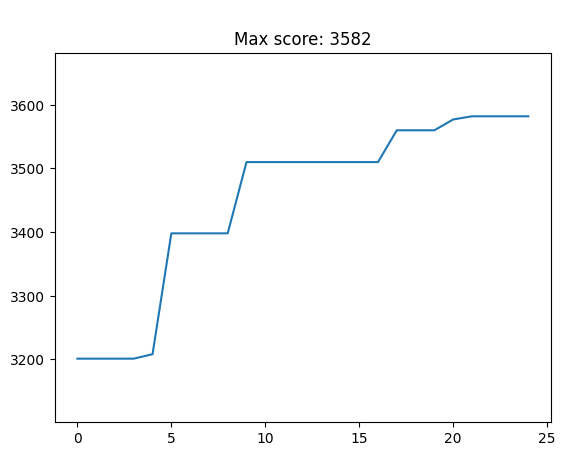

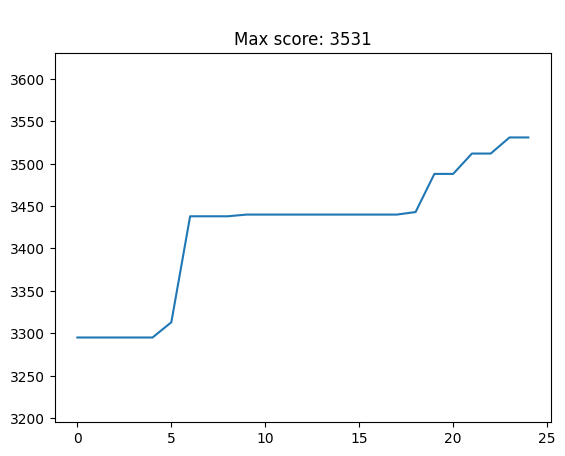

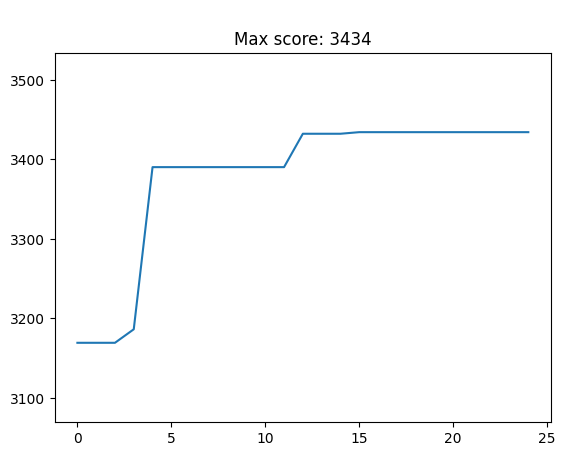

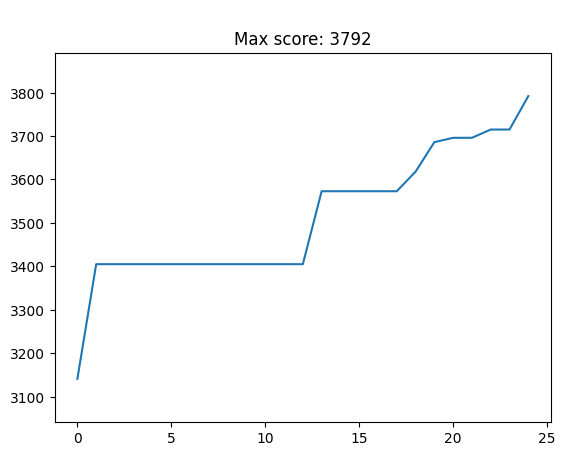

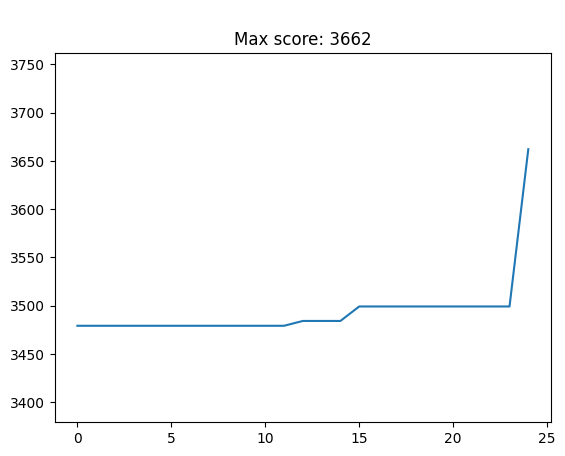

In [26]:
ga_runner = KnapsackGA(KNAPSACK)
max_scores = []
for _ in range(PLOT):
    scores = ga_runner.select(GENERATIONS, POPULATION_SIZE, MUTATION_RATE, CROSSOVER_RATE, max_weight=MAX_WEIGHT)
    plt.plot(scores)
    max_score = scores[-1]
    max_scores.append(max_score)
    plt.ylim(min(scores)-100, max_score+100)
    plt.title(f"\nMax score: {max_score}")
    plt.show()
    if i != PLOT - 1:
        print("\n\n-----------------------------------------------------------------------------------")

In [13]:
ga_runner = KnapsackGA(KNAPSACK)
max_scores = []
for _ in range(100):
    scores = ga_runner.select(GENERATIONS, POPULATION_SIZE, .01, 0.7, max_weight=MAX_WEIGHT)
    max_scores.append(scores[-1])
np.mean(max_scores)

3627.24